In [47]:
import sys
sys.path.append('./../../src')

# python shit
import datetime

# others shit
from matplotlib import pyplot

# my shit
from lib.stonk_jar import StonkJar

In [17]:
ticker = 'AAPL'
jar = StonkJar(ticker)

In [18]:
time_frame = '1'
historical_pickle_name = "{0}.technical.{1}.historical.df.pkl".format(ticker, time_frame)
data = jar.read_pickle_dataframe(historical_pickle_name)

In [19]:
data.describe()

,v,e_a,e_e,r_ss,r_s,r_h,r_b,r_sb
count,3.860305e+06,3.860305e+06,3.860305e+06,3.860305e+06,3.860305e+06,3.860305e+06,3.860305e+06,3.860305e+06
mean,5.000387e+01,1.680000e+00,1.555857e+00,1.537892e-02,1.537892e-02,1.784524e-01,5.083847e-01,2.824051e-01
std,2.857487e+01,1.376677e-14,1.421086e-14,1.149616e-02,1.149616e-02,1.842182e-02,3.311151e-02,6.699199e-03
min,1.000000e+00,1.680000e+00,1.555857e+00,0.000000e+00,0.000000e+00,1.582734e-01,4.520548e-01,2.773973e-01
25%,2.500000e+01,1.680000e+00,1.555857e+00,0.000000e+00,0.000000e+00,1.582734e-01,4.760274e-01,2.773973e-01
50%,5.000000e+01,1.680000e+00,1.555857e+00,2.397260e-02,2.397260e-02,1.746575e-01,5.000000e-01,2.773973e-01
75%,7.500000e+01,1.680000e+00,1.555857e+00,2.397260e-02,2.397260e-02,1.986301e-01,5.503597e-01,2.913669e-01
max,9.900000e+01,1.680000e+00,1.555857e+00,2.397260e-02,2.397260e-02,2.226027e-01,5.503597e-01,2.913669e-01


In [20]:
data.sample()

,ts,o,l,h,c,v,e_a,e_e,r_ss,r_s,r_h,r_b,r_sb
ts,,,,,,,,,,,,,
9910,2020-12-08 03:10:00,31329900.626012,31424173.145448,31377036.88573,31549869.83803,6,1.68,1.555857,0.023973,0.023973,0.19863,0.476027,0.277397


In [42]:
def graph(data_frame):
    # specify columns to plot
    groups = [1, 2, 3, 4]
    i = 1
    # plot each column
    pyplot.figure()
    for group in groups:
        # pyplot.subplot(len(groups), 1, i)
        pyplot.plot(data.values[:, group])
        pyplot.title(data.columns[group], y=0.5, loc='right')
        pyplot.show()
        i += 1

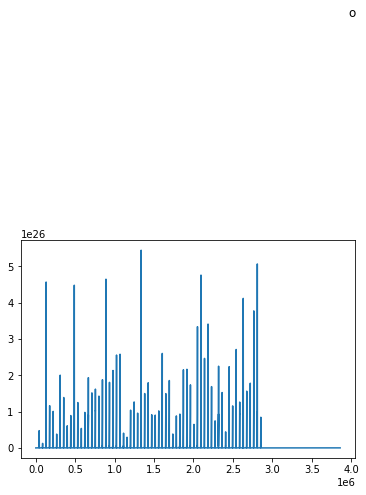

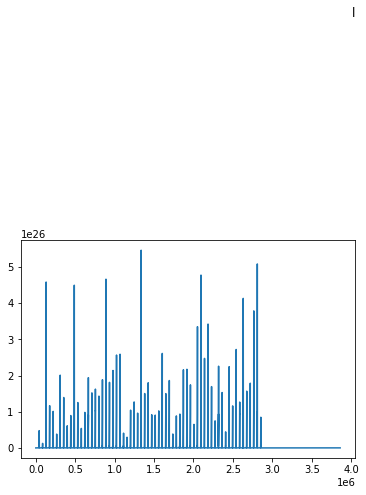

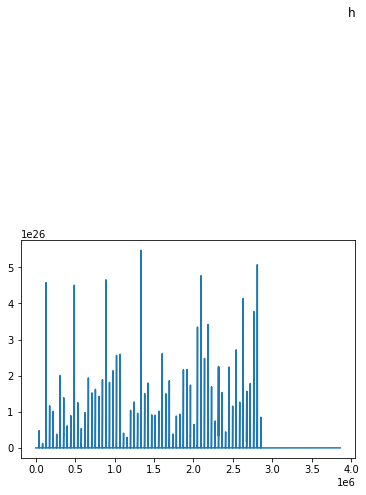

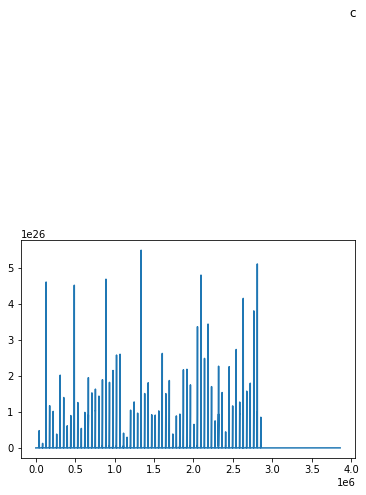

In [41]:
graph(data)

Can we make certain statistical observations on the data set that we can use to input as variables to the prediction CNN? If we recalculate the statistical observations every time period, we can keep a statistical overview of the activity at various time levels.

Obvious derived values might be:

- gradients of o/l/h/c values
- max/min of o/c values
- std dev of o/c values

In [43]:
bunk_data = jar.read_pickle_dataframe('AAPL-12-08-2020.1.technical.df.pkl')

In [44]:
bunk_data.describe()

,0,5,6,7,8,9,10,11,12
count,4.464000e+04,44640.000000,44640.00,4.464000e+04,4.464000e+04,4.464000e+04,4.464000e+04,4.464000e+04,4.464000e+04
mean,1.608142e+09,49.951792,1.68,1.555857e+00,2.397260e-02,2.397260e-02,1.986301e-01,4.760274e-01,2.773973e-01
std,7.731961e+05,28.558380,0.00,2.220471e-16,6.938972e-18,6.938972e-18,2.775589e-17,1.110235e-16,5.551177e-17
min,1.606802e+09,1.000000,1.68,1.555857e+00,2.397260e-02,2.397260e-02,1.986301e-01,4.760274e-01,2.773973e-01
25%,1.607472e+09,25.000000,1.68,1.555857e+00,2.397260e-02,2.397260e-02,1.986301e-01,4.760274e-01,2.773973e-01
50%,1.608142e+09,50.000000,1.68,1.555857e+00,2.397260e-02,2.397260e-02,1.986301e-01,4.760274e-01,2.773973e-01
75%,1.608811e+09,75.000000,1.68,1.555857e+00,2.397260e-02,2.397260e-02,1.986301e-01,4.760274e-01,2.773973e-01
max,1.609481e+09,99.000000,1.68,1.555857e+00,2.397260e-02,2.397260e-02,1.986301e-01,4.760274e-01,2.773973e-01


In [45]:
bunk_data.sample()

,0,1,2,3,4,5,6,7,8,9,10,11,12
6397,1607186220,389980.805602,391154.268407,392053.923225,392718.885481,45,1.68,1.555857,0.023973,0.023973,0.19863,0.476027,0.277397


In [29]:
bunk_candles = jar.read_pickle_dataframe('AAPL_candles.1.2020-12-08.pkl')

In [52]:
datetime.datetime.fromtimestamp(1607186220)

datetime.datetime(2020, 12, 5, 10, 37)